# DREAM EXPERIMENT: C/S ratio vs inclination of BGO

Importing modules

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
import scipy.optimize as optim
import scipy.stats as stats
import os
from IPython.display import clear_output

In [8]:
# Moyal distribution + parameters
def f(x,mean,normalization,form):
    return normalization*stats.moyal.pdf(form*(x-mean))


CHERENKOV:
mode = 1671.5500000000002 +/- inf
Normalization = 0.027786181073528413 +/- inf
Form factor = 70.0 +/- inf

SCINTILLATION:
mode = 144046.43 +/- inf
Normalization = 0.7 +/- inf
Form factor = 0.00033273987949841754 +/- inf


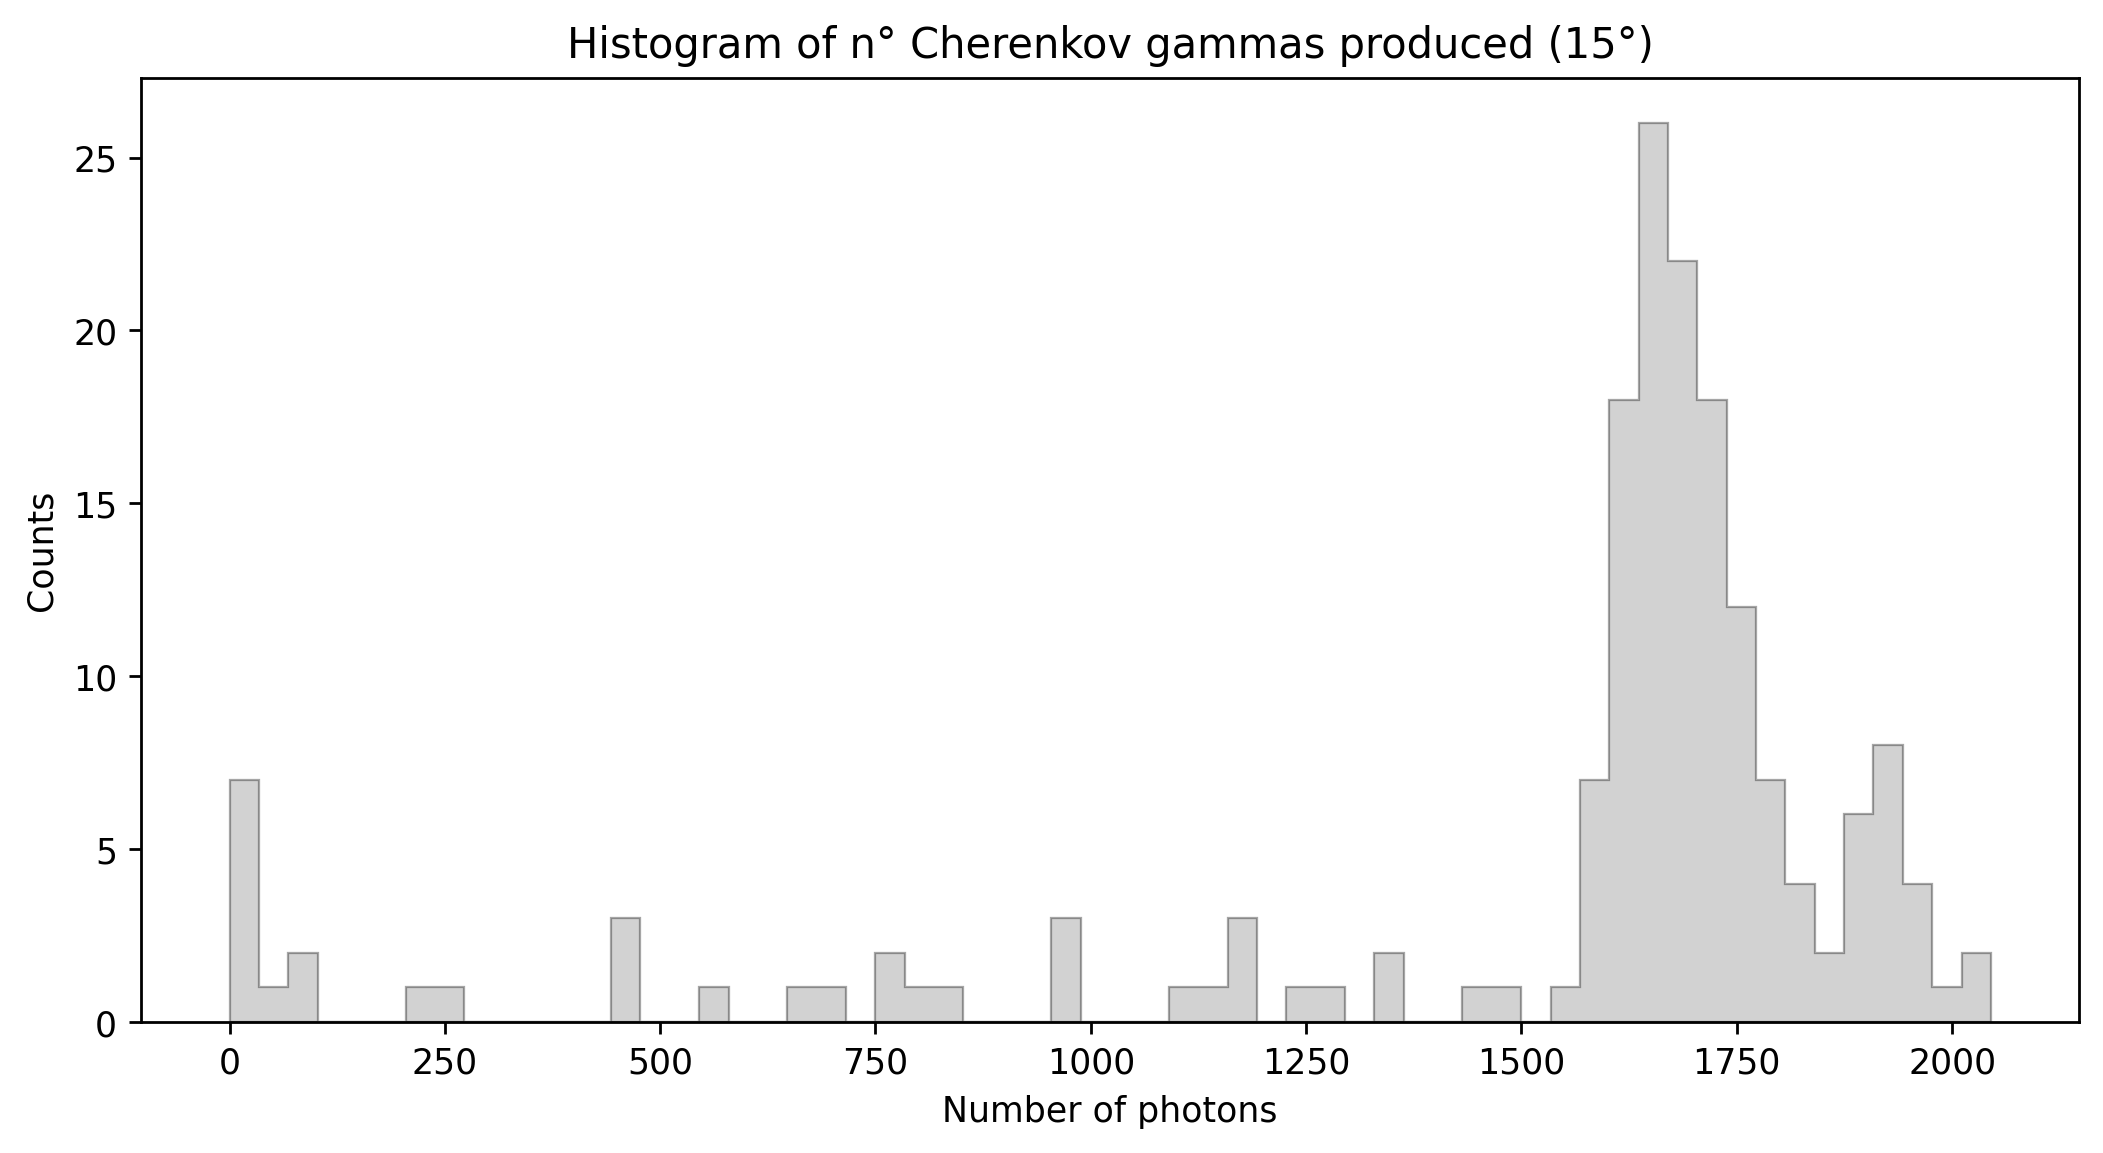

In [21]:
# directory
directory = '../datasets/Total/'
preFileName = 'numbers'
postFileName = '.txt'

# angles:
theta_names = ['p15']#['0','P15','P20','P25','P30','P40']
angles = 0#[0,15,20,25,30,40]
fileNames = [preFileName + i + postFileName for i in theta_names]

CSratioM, Delta_CSratioM = [],[]
nbins = 50

#loading files
for name in fileNames:
    numberC_raw, totalC_raw, numberS_raw, totalS_raw = np.loadtxt(directory+name, unpack=True, usecols=(0,1,2,3))
    
    numC, numS, totalC, totalS = [],[],[],[]
    for i, val in enumerate(numberC_raw):
        if totalC_raw[i] > 1500 and totalS_raw[i] > 125000:
            numC.append(val)
            numS.append(numberS_raw[i])
            totalC.append(totalC_raw[i])
            totalS.append(totalS_raw[i])
    
    # now need to make the histo of C and S values
    bin_heightsC, bin_bordersC = np.histogram(totalC, bins=nbins, density=True)
    bin_centersC = bin_bordersC[:-1] + 0.5*np.diff(bin_bordersC)
    
    bin_heightsS, bin_bordersS = np.histogram(totalS, bins=nbins, density=True)
    bin_centersS = bin_bordersS[:-1] + 0.5*np.diff(bin_bordersS)
    
    # plot the histo
    fig = plt.figure(111, figsize=(10,5), dpi=250)
    plt.hist(totalC_raw, bins=60, label='BGO crystal', histtype="stepfilled",
        color='gray', ec='black', alpha=0.35, lw=0.65, density=False)
    plt.title("Histogram of n° Cherenkov gammas produced (15°)")
    plt.xlabel('Number of photons')
    plt.ylabel('Counts')
    plt.savefig("Histo0.jpg",bbox_inches='tight')
    
    # landau fit
    bin_heightsC = list(bin_heightsC)
    bin_heightsS = list(bin_heightsS)
    idxC = bin_heightsC.index(max(bin_heightsC))
    idxS = bin_heightsS.index(max(bin_heightsS))
    [mode_C, normalization_C, form_C], covariance_C = optim.curve_fit(f, bin_centersC, bin_heightsC, p0=[bin_centersC[idxC],max(bin_heightsC),70])
    [mode_S, form_S, normalization_S], covariance_S = optim.curve_fit(f, bin_centersS, bin_heightsS, p0=[bin_centersS[idxS],max(bin_heightsS),0.7])
    
    # print results
    clear_output(wait=True)
    print("\nCHERENKOV:")
    print("mode = {0} +/- {1}".format(mode_C,covariance_C[0][0]))
    print("Normalization = {0} +/- {1}".format(normalization_C,covariance_C[1][1]))
    print("Form factor = {0} +/- {1}".format(form_C,covariance_C[2][2]))
    
    print("\nSCINTILLATION:")
    print("mode = {0} +/- {1}".format(mode_S,covariance_S[0][0]))
    print("Normalization = {0} +/- {1}".format(normalization_S,covariance_S[1][1]))
    print("Form factor = {0} +/- {1}".format(form_S,covariance_S[2][2]))
    
    CSratioM.append(sum(totalC_raw)/sum(totalS_raw))

Writing in an output file:

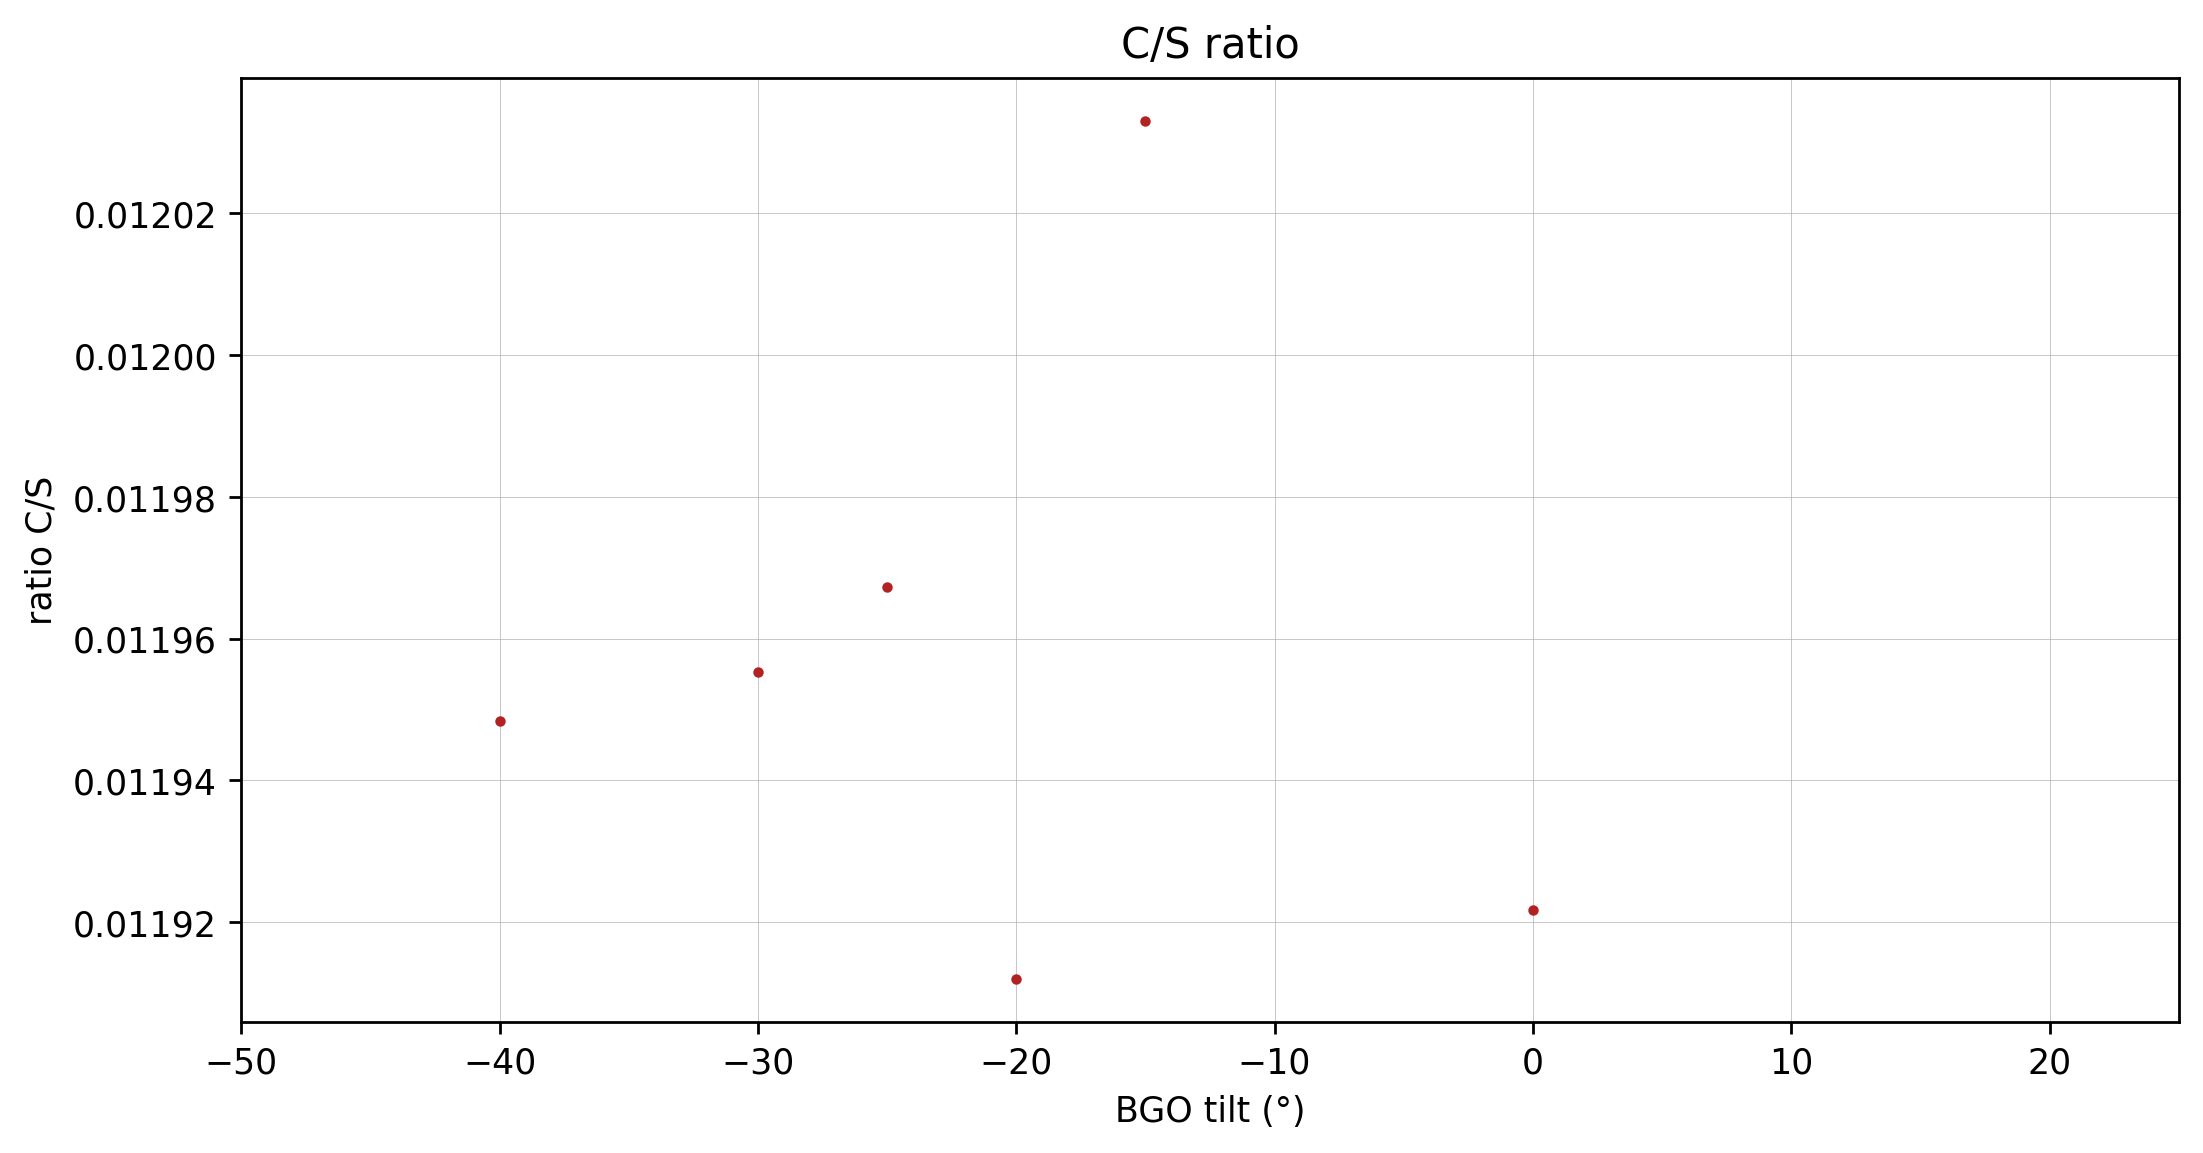

In [10]:
# flip angles
flipped_angles = []
for theta in angles:
    flipped_angles.append(-theta)

# prepare the figure
fig = plt.figure(111, figsize=(10,5), dpi=250)

# plot data
plt.errorbar(flipped_angles, CSratioM, yerr=None, xerr=None, label='C/S number of $\gamma$s',
             marker='o', markersize=2, color="firebrick", ecolor="black", lw=0, elinewidth=0.5)

# visualize
plt.title('C/S ratio')
plt.xlabel('BGO tilt (°)')
plt.ylabel('ratio C/S')
plt.xlim([-50,25])
plt.grid(linestyle='-', linewidth=0.2)
plt.show()